# Time Series Analysis Tutorial with Python- Google trends data of keywords 'diet', 'gym' and 'finance' 

- Source your data
- Wrangle your data
- Exploratory Data Analysis
- Trends and seasonality in time series data
- Identifying Trends
- Seasonal patterns
- First Order Differencing
- Periodicity and Autocorrelation

In [79]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make use of the IPython magic by adding %matplotlib inline 
# switch to the Seaborn defaults with sns.set():
%matplotlib inline
sns.set()

In [80]:
# load csv data
df = pd.read_csv('multiTimeline.csv',  skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


## Wrangle Data

In [82]:
# rename the columns of your DataFrame df so that they have no whitespaces in them.
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [83]:
# turn the 'month' column into a DateTime data type and make it the index of the DataFrame.
# Since 'Month' column was actually an of data type object

df.month = pd.to_datetime(df.month)

# Make sure to include the inplace argument when you're setting the index of 
# the DataFrame df so that you actually alter the original index and set it to the 'month' column.

df.set_index('month', inplace = True)
df.head()


,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


 ## Exploratory Data Analysis (EDA)

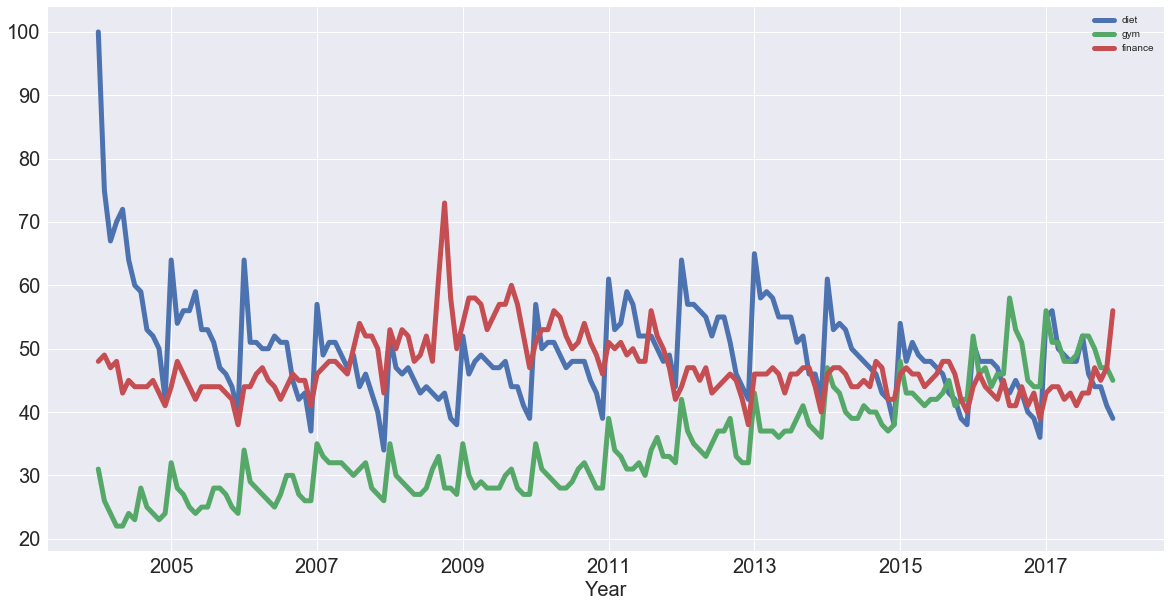

In [84]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
# to suppress the Matplotlib output, just add a semicolon ; to your last line of code!
plt.xlabel('Year', fontsize=20);

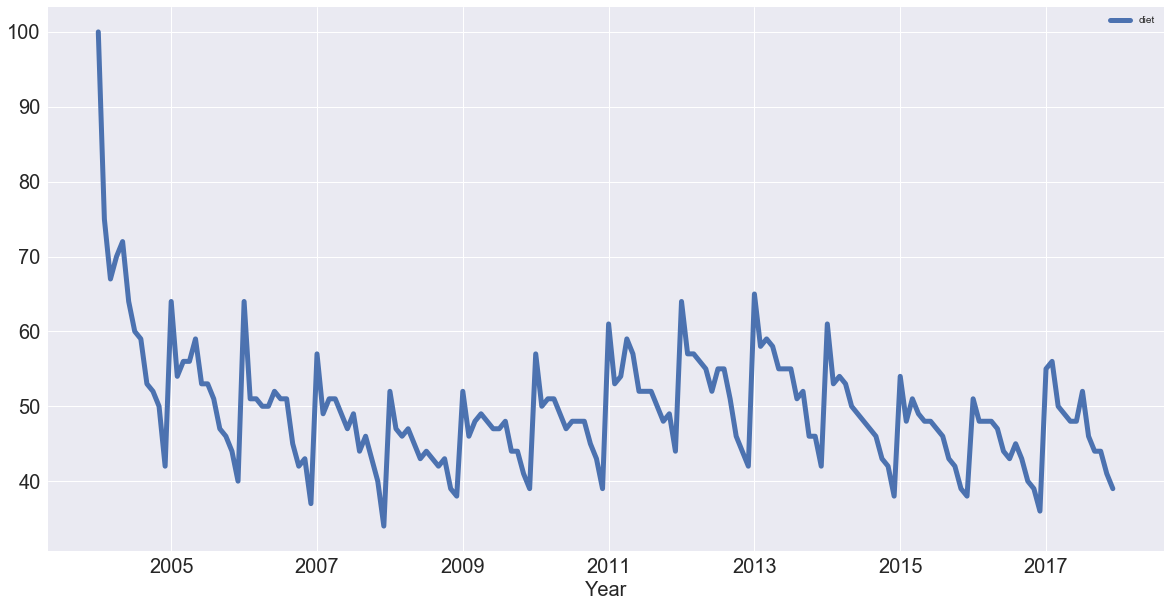

In [85]:
# plot the 'diet' column by itself as a time series:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
# Note that in the code chunk above you used two sets of squared brackets to extract 
# the 'diet' column as a DataFrame; If you would have used one set, like df['diet'], 
# you would have created a pandas Series.
plt.xlabel('Year', fontsize = 20);

The first thing to notice is that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

### Trends and Seasonality in Time Series Data


#### Identify trends in time series
One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

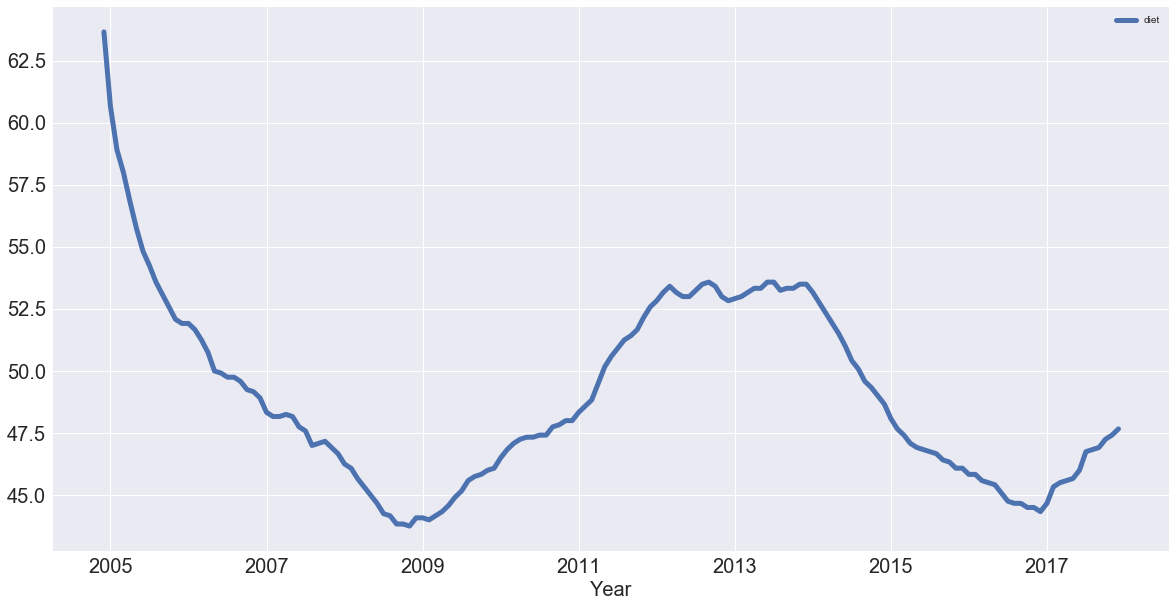

In [86]:
# To determining the window size, here, it makes sense to first try out one of twelve months, 
# as you're talking about yearly seasonality.
# Check out this rolling average of 'diet' using the built-in pandas methods.
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

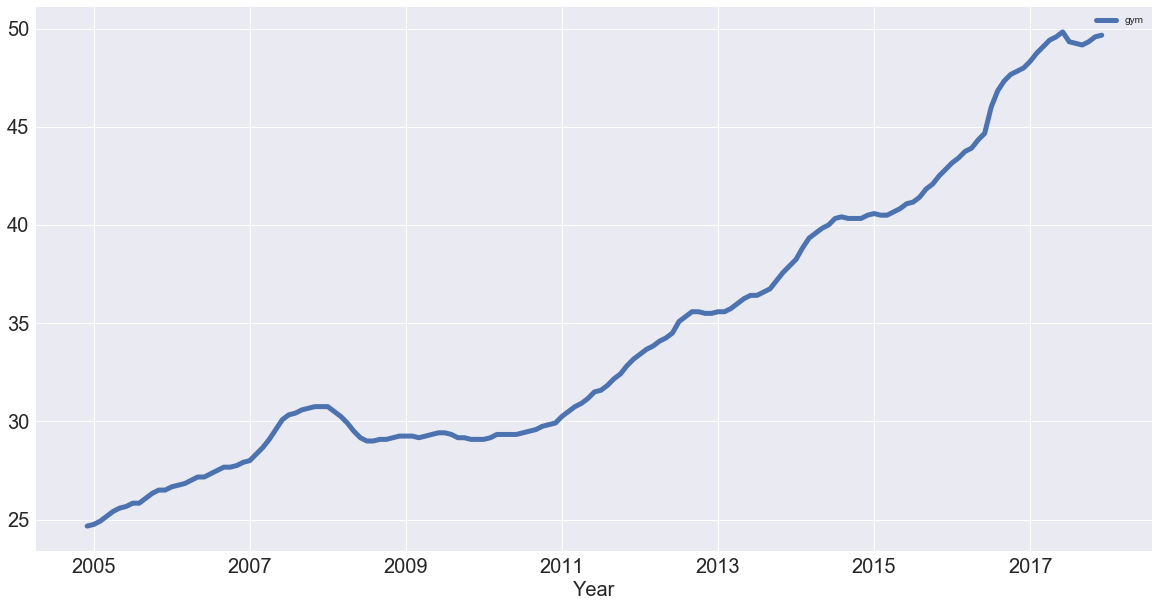

In [87]:
# Check out this rolling average of 'gym' using the built-in pandas methods.
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

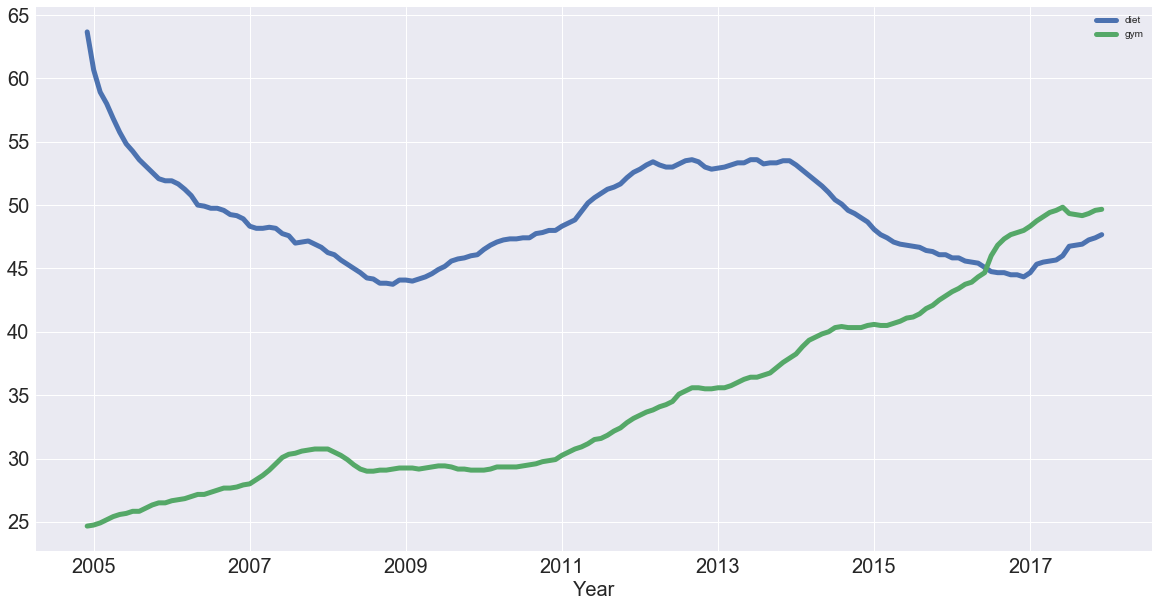

In [88]:
# plotting the trends of 'gym' and 'diet' on a single figure:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis = 1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### Seasonal Patterns in Time Series Data
- One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.
- Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

#### First-order differencing
- Differencing is super helpful in turning your time series into a stationary time series(whose statistical properties (such as mean and variance) don't change over time.
- You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

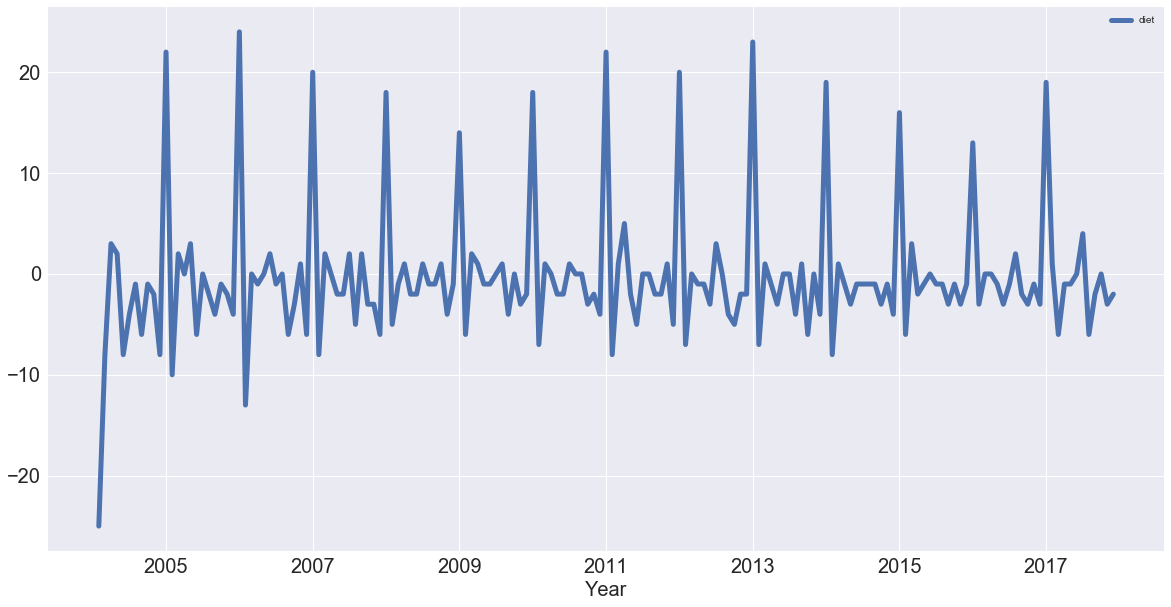

In [89]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

### Periodicity and Autocorrelation
- A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

- Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

- The correlation coefficient of two variables captures how linearly related they are. To understand this, you'll take a look at a practical example with the help of the iris data set, which contains measurements of flowers. To study this in further detail, you'll import the iris dataset from scikit-learn, turn it into a DataFrame and view the first rows with the help of .head():

In [94]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], 
                    columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


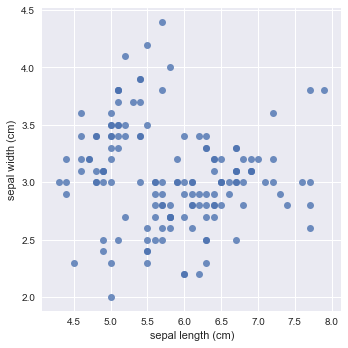

In [91]:
# use pandas or seaborn to build a scatter plot of 'sepal length' against 'sepal width':
# Note that you turned off the linear regression by setting the fit_reg argument to False.
sns.lmplot(x = 'sepal length (cm)', y= 'sepal width (cm)', fit_reg=False, data=df_iris);

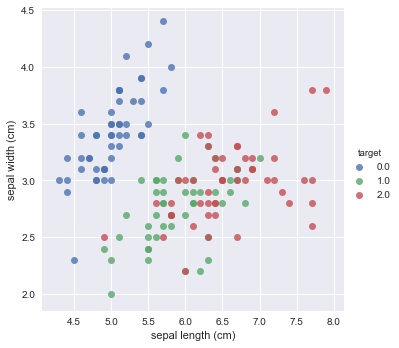

In [92]:
# Let's now build a scatter plot of 'sepal length' against 'sepal width', coloured by the target (species)
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris, hue='target');

In [93]:
# compute the correlation coefficients of each pair of measurements with the help of the .corr() method:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [78]:
# Let's compute the correlation coefficients of each pair of measurements within each species. 
# The way to do this is by chaining the .groupby() and .corr() methods, to group by the target and print the correlation coefficient:
df_iris.groupby(['target']).corr()

petal length (cm)  petal width (cm)  \
target                                                          
0.0    petal length (cm)           1.000000          0.306308   
       petal width (cm)            0.306308          1.000000   
       sepal length (cm)           0.263874          0.279092   
       sepal width (cm)            0.176695          0.279973   
1.0    petal length (cm)           1.000000          0.786668   
       petal width (cm)            0.786668          1.000000   
       sepal length (cm)           0.754049          0.546461   
       sepal width (cm)            0.560522          0.663999   
2.0    petal length (cm)           1.000000          0.322108   
       petal width (cm)            0.322108          1.000000   
       sepal length (cm)           0.864225          0.281108   
       sepal width (cm)            0.401045          0.537728   

                          sepal length (cm)  sepal width (cm)  
target                                                         
0.0    petal length (cm)           0.263874          0.176695  
       petal width (cm)            0.279092          0.279973  
       sepal length (cm)           1.000000          0.746780  
       sepal width (cm)            0.746780          1.000000  
1.0    petal length (cm)           0.754049          0.560522  
       petal width (cm)            0.546461          0.663999  
       sepal length (cm)           1.000000          0.525911  
       sepal width (cm)            0.525911          1.000000  
2.0    petal length (cm)           0.864225          0.401045  
       petal width (cm)            0.281108          0.537728  
       sepal length (cm)           1.000000          0.457228  
       sepal width (cm)            0.457228          1.000000

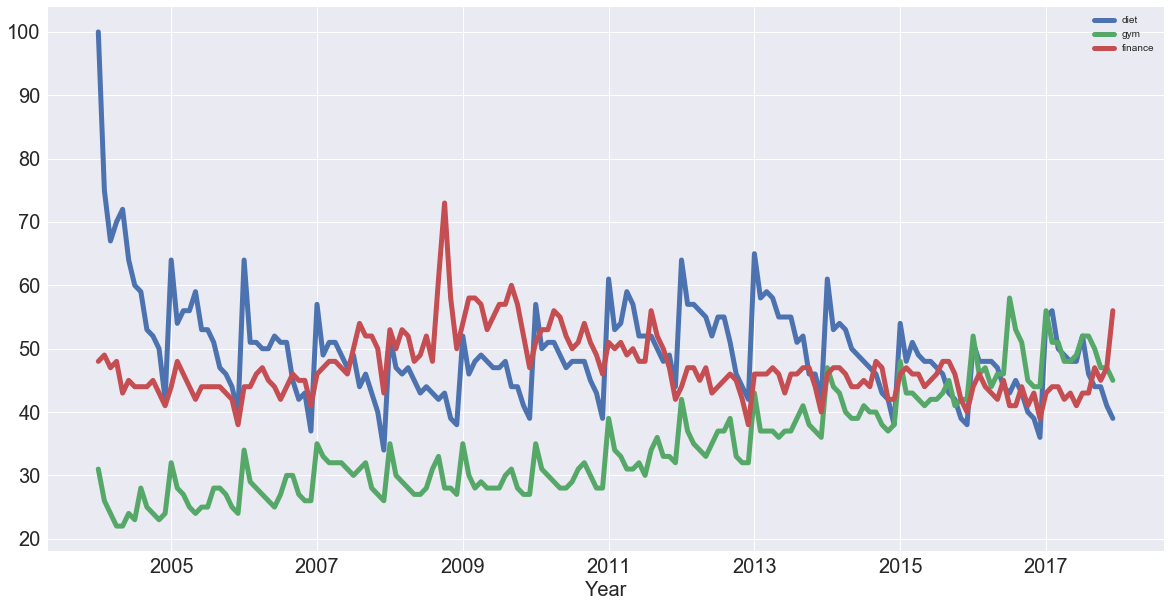

In [95]:
# plot all your time series again to remind yourself of what they look like:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [96]:
# compute the correlation coefficients of all of these time series with the help of .corr():
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Let's focus on 'diet' and 'gym', their seasonal components would be positively correlated and their trends negatively correlated.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

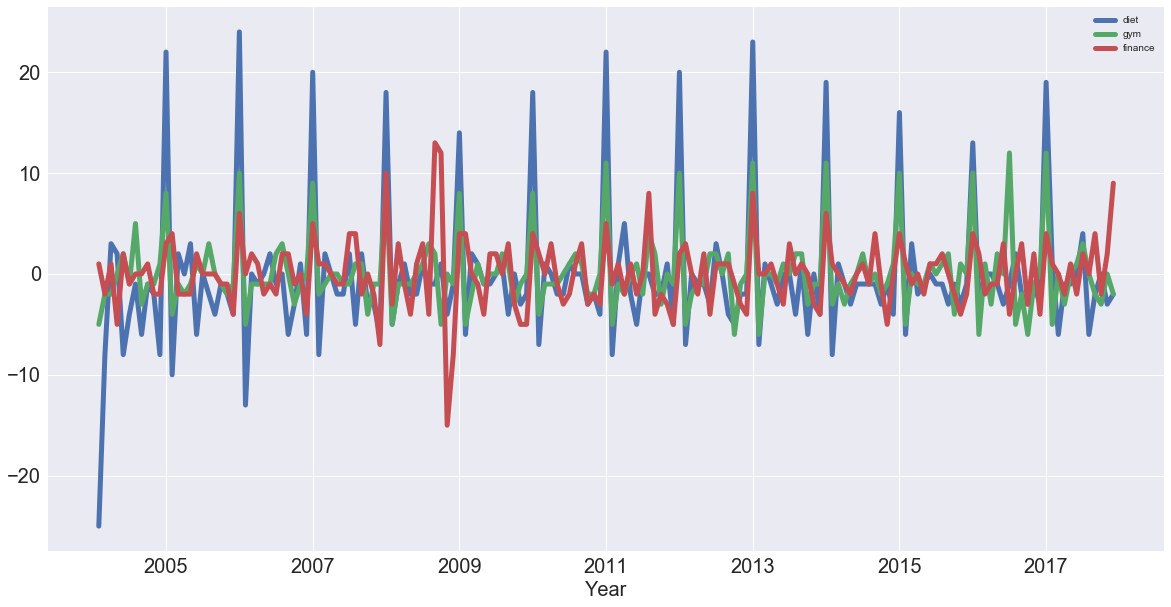

In [97]:
#Start off by plotting the first-order differences with the help of .diff() and .plot():
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [98]:
#compute the correlation coefficients of the first-order differences of these time series:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


#### Autocorrelation

to plot the autocorrelation of the 'diet' series:on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

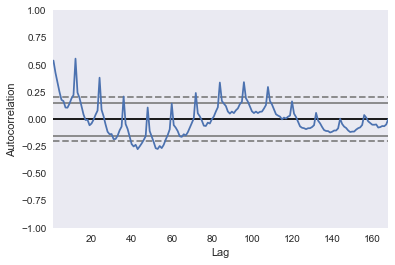

In [101]:
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

Of course, you have a correlation of itself with itself at a lag of 0.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!

#### Looking into finance column


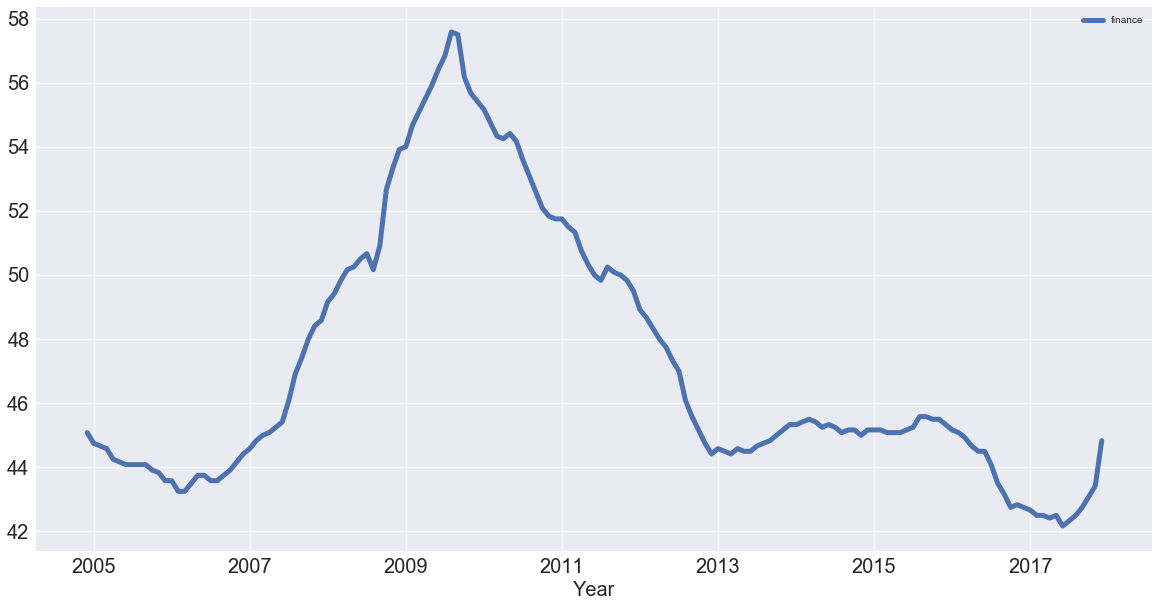

In [102]:
# plotting the trends of 'finance' on a single figure:
finance = df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

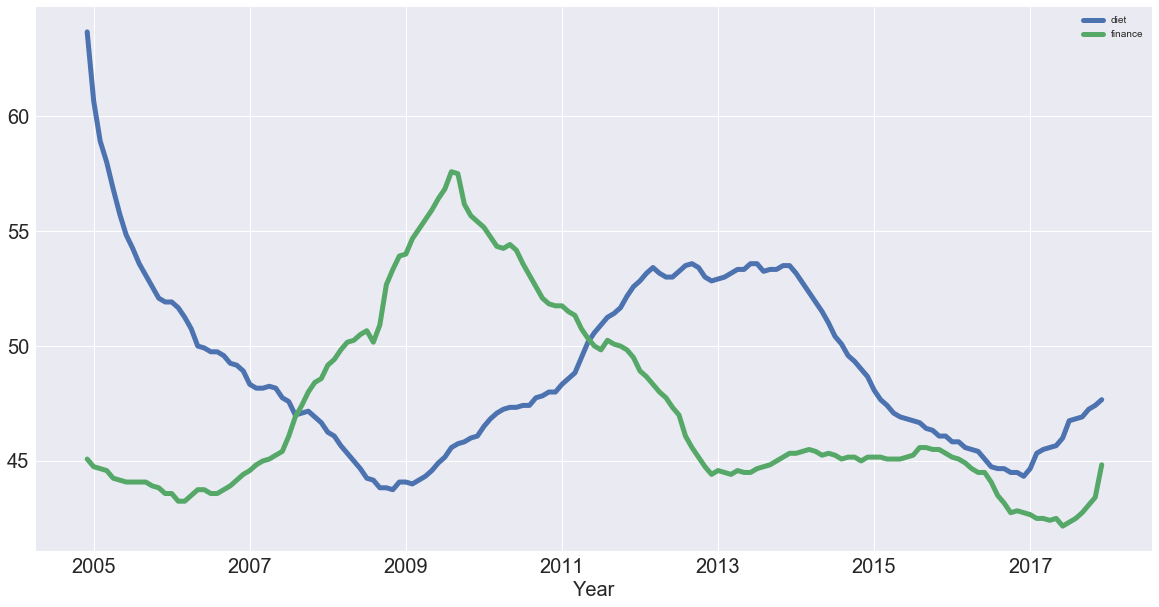

In [103]:
# plotting the trends of 'finance' and 'diet' on a single figure:
df_fd = pd.concat([diet.rolling(12).mean(), finance.rolling(12).mean()], axis = 1)
df_fd.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

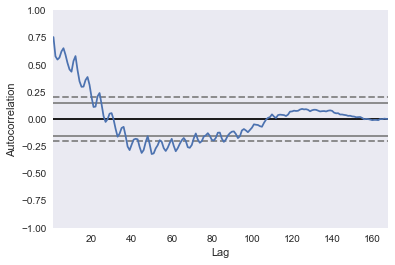

In [104]:
# Autocorrelation of finance
pd.plotting.autocorrelation_plot(finance);